In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2019 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# Surface Analysis using Declarative Syntax

The MetPy declarative syntax allows for a simplified interface to creating common
meteorological analyses including surface observation plots.

In [3]:
from datetime import datetime, timedelta

import cartopy.crs as ccrs
import pandas as pd

from metpy.cbook import get_test_data
import metpy.plots as mpplots

**Getting the data**

In this example, data is originally from the Iowa State ASOS archive
(https://mesonet.agron.iastate.edu/request/download.phtml) downloaded through a separate
Python script. The data are pre-processed to determine sky cover and weather symbols from
text output.

In [4]:
data = pd.read_csv(get_test_data('SFC_obs.csv', as_file_obj=False))
data['valid'] = pd.to_datetime(data['valid'], format='%Y-%m-%d %H:%M:%S')

**Plotting the data**

Use the declarative plotting interface to plot surface observations over the state of
Georgia.

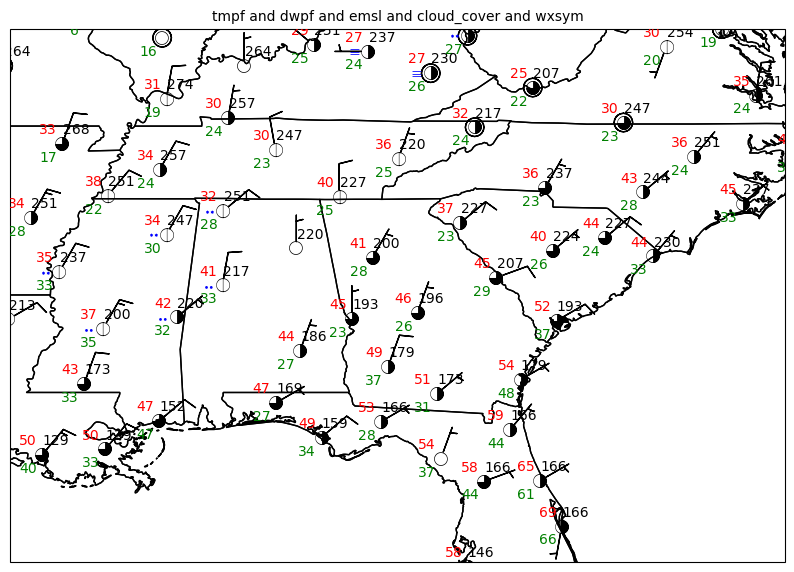

In [5]:
# Plotting the Observations using a 15 minute time window for surface observations
obs = mpplots.PlotObs()
obs.data = data
obs.time = datetime(1993, 3, 12, 13)
obs.time_window = timedelta(minutes=15)
obs.level = None
obs.fields = ['tmpf', 'dwpf', 'emsl', 'cloud_cover', 'wxsym']
obs.locations = ['NW', 'SW', 'NE', 'C', 'W']
obs.colors = ['red', 'green', 'black', 'black', 'blue']
obs.formats = [None, None, lambda v: format(10 * v, '.0f')[-3:], 'sky_cover',
               'current_weather']
obs.vector_field = ('uwind', 'vwind')
obs.reduce_points = 1

# Add map features for the particular panel
panel = mpplots.MapPanel()
panel.layout = (1, 1, 1)
panel.area = 'ga'
panel.projection = ccrs.PlateCarree()
panel.layers = ['coastline', 'borders', 'states']
panel.plots = [obs]

# Collecting panels for complete figure
pc = mpplots.PanelContainer()
pc.size = (10, 10)
pc.panels = [panel]

# Showing the results
pc.show()